<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dia 1 -

Referências:
* https://jakevdp.github.io/PythonDataScienceHandbook/ - Esse livro contém uma boa introdução ao Python e aos métodos "clássicos" de machine learning.
*

In [5]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")

# O conjunto de dados é retornado como um objeto semelhante a um dicionário com os dados e os alvos
X, y = mnist["data"], mnist["target"]

# X é o array de imagens, e y é o array de rótulos
# Cada imagem é representada como um array 1D de 784 características (28x28 pixels)
# Você pode querer converter os rótulos (y) para inteiros
y = y.astype(int)

# Agora você pode usar X e y para treinar um modelo de aprendizado de máquina

In [6]:
X = X.to_numpy()
Y = y.to_numpy()
X.shape, Y.shape

((70000, 784), (70000,))

<BarContainer object of 784 artists>

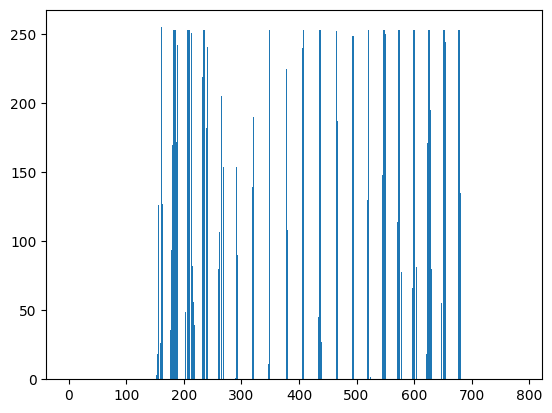

In [15]:
plt.bar(list(range(len(X[0]))),X[0])

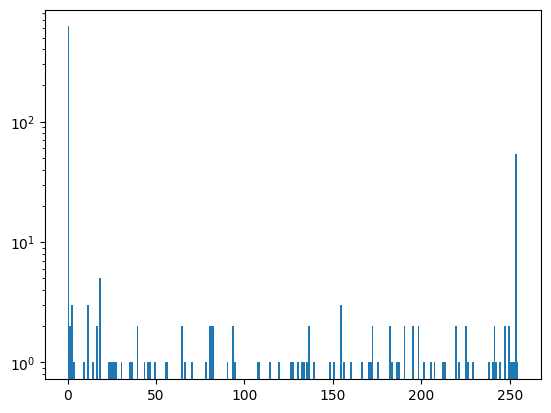

In [80]:
plt.hist(X[0], bins=255)
plt.yscale("log")
plt.show()

LABEL:  5


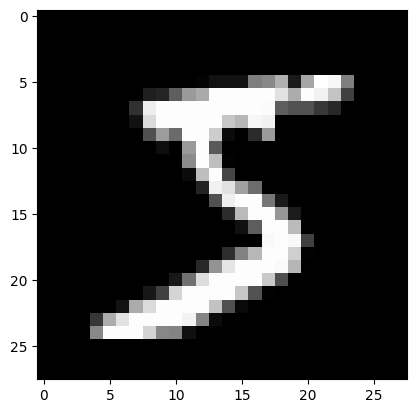

In [21]:
import matplotlib.pyplot as plt

print("LABEL: ", Y[0])
plt.imshow(X[0].reshape((28,28)), cmap="gray")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression()

In [24]:
y1_pred = model1.predict(X)

In [25]:
y1_pred, Y

(array([4.24166265, 1.18218974, 3.19922958, ..., 7.87853978, 5.58042962,
        5.77723502]),
 array([5, 0, 4, ..., 4, 5, 6]))

In [29]:
import numpy as np
(y1_pred.round()==Y).sum()/len(X)

0.22757142857142856

In [31]:
import numpy as np
model2 = LinearRegression()
Y2 = np.array([np.eye(10)[_] for _ in Y])
Y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [32]:
model2.fit(X,Y2)

LinearRegression()

In [35]:
y2 = model2.predict(X)
y2[0]

array([ 8.06062936e-02,  1.33404311e-04, -7.81109236e-02,  4.02657611e-01,
       -1.98306329e-01,  5.25759137e-01,  1.93141708e-01,  3.06880983e-01,
       -1.40383422e-01, -9.32330784e-02])

In [28]:
(np.argmax(y2, axis=-1) == np.argmax(Y2, axis=-1)).sum()/len(X)

0.8578857142857143

In [37]:
model1.intercept_

2.9755303100826485

In [39]:
model2.intercept_

array([ 0.16359   ,  0.2433623 ,  0.05103905,  0.01929909,  0.20569496,
        0.18727076,  0.06903461,  0.14046435, -0.12390439,  0.04429453])

In [69]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(random_state=42)

In [71]:
model3.fit(X,Y)

DecisionTreeRegressor(random_state=42)

In [72]:
y3 = model3.predict(X)

In [73]:
y3

array([5., 0., 4., ..., 4., 5., 6.])

In [74]:
(y3==Y).sum(axis=-1)/len(X)

1.0

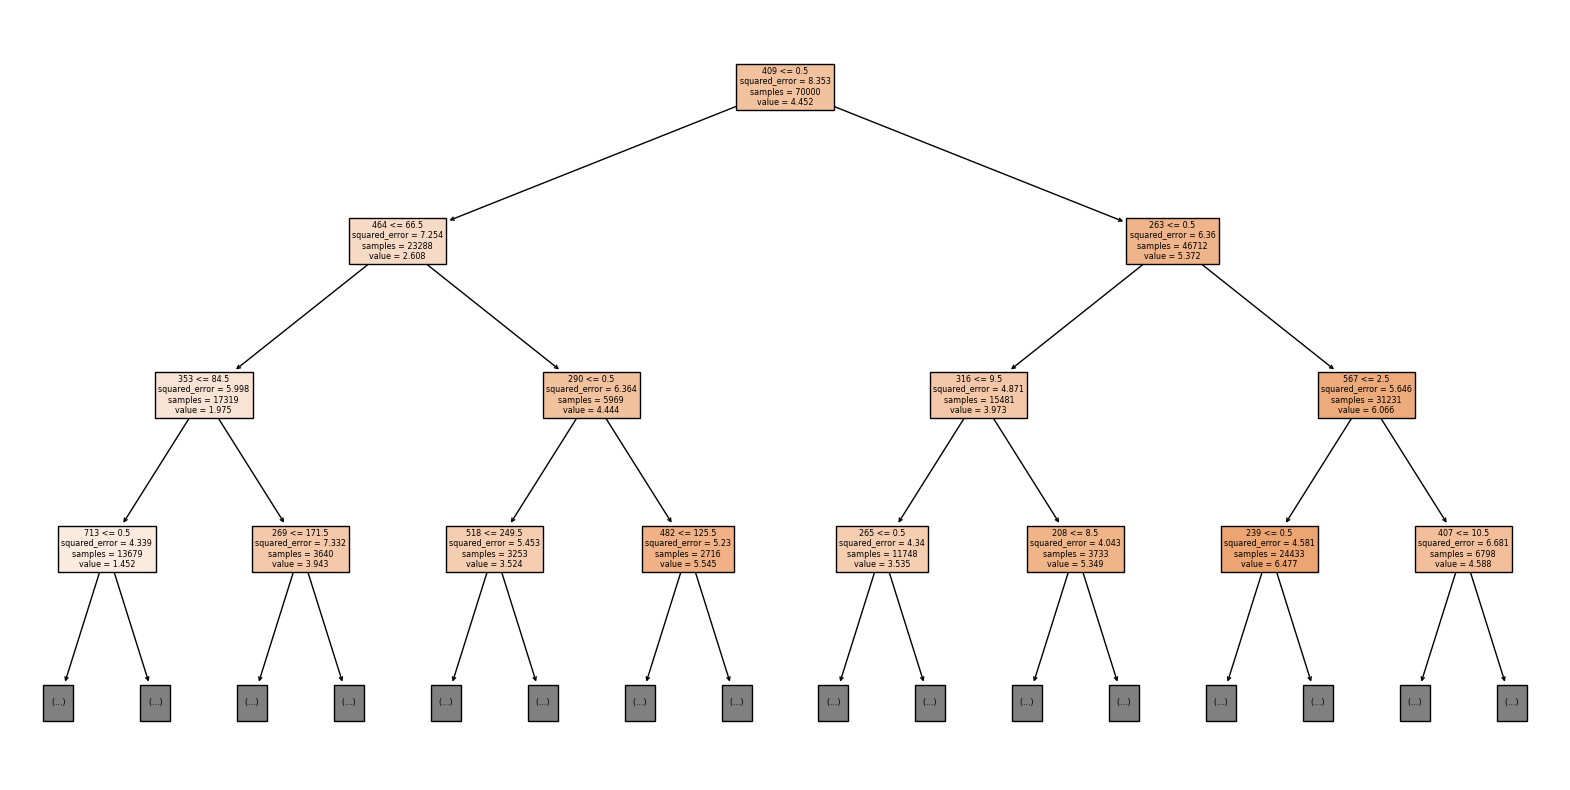

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(model3, filled=True, feature_names=[str(_) for _ in range(28*28)], max_depth=3)
plt.show()

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'